In [1]:
from src import Build_mc,Upload_geof,Upload_litologia,transform_to_carta_utm,plot_raw_mag_data,plot_raw_gama_data,plot_histograms,describe_geologico, plotBoxplots,remove_negative_values,sintetic_grid,traditional_interpolation
from verde_source import regular, interp_at
from tqdm import tqdm
from shapely.ops import transform
from pylab import *
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import verde as vd
import numpy as np
import os
import pyproj
import warnings
warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
FEAT=['CTCOR','eTh','eU','KPERC','UTHRAZAO','UKRAZAO','THKRAZAO','MDT']
titles=['Contagem Total', 'Th (ppm)', 'U (ppm)','K (%)','U/Th', 'U/K', 'Th/K', 'MDT (m)']
# Titulos                                                                                   
titles=titles                                                                                       
dic_titles = {}                                                                        
for f, t in zip(FEAT, titles):
    dic_titles[f] = t
# Percentiles          
percentiles=(0.001,0.01,0.05,0.25,0.5,0.75,0.9995)

In [3]:
list_geof = os.listdir('/home/ggrl/database/geof/')
list_geof

['mag_line_1105',
 'mag_1039',
 'gama_line_1105',
 'mag_line_1089',
 'gama_1039',
 'mag_3022',
 'mag_1105',
 'mag_tie_1105',
 'gama_1039_mdt.csv',
 'gama_line_1089',
 'gama_3022',
 'gama_line_1092',
 'geof_1039']

# Construindo Quadrícula

In [4]:
quadricula = Build_mc(escala='50k',ID=['SF23_YA','SF23_YB','SF23_VD','SF23_VC'],verbose=True)

100%|██████████| 4/4 [00:00<00:00, 25.31it/s]
97it [00:00, 5424.56it/s]

 - Folha "SF23_YA_I1" adicionada.
 - Folha "SF23_YA_I3" adicionada.
 - Folha "SF23_YA_IV1" adicionada.
 - Folha "SF23_YA_IV3" adicionada.
 - Folha "SF23_YA_I2" adicionada.
 - Folha "SF23_YA_I4" adicionada.
 - Folha "SF23_YA_IV2" adicionada.
 - Folha "SF23_YA_IV4" adicionada.
 - Folha "SF23_YA_II1" adicionada.
 - Folha "SF23_YA_II3" adicionada.
 - Folha "SF23_YA_V1" adicionada.
 - Folha "SF23_YA_V3" adicionada.
 - Folha "SF23_YA_II2" adicionada.
 - Folha "SF23_YA_II4" adicionada.
 - Folha "SF23_YA_V2" adicionada.
 - Folha "SF23_YA_V4" adicionada.
 - Folha "SF23_YA_III1" adicionada.
 - Folha "SF23_YA_III3" adicionada.
 - Folha "SF23_YA_VI1" adicionada.
 - Folha "SF23_YA_VI3" adicionada.
 - Folha "SF23_YA_III2" adicionada.
 - Folha "SF23_YA_III4" adicionada.
 - Folha "SF23_YA_VI2" adicionada.
 - Folha "SF23_YA_VI4" adicionada.
 - Folha "SF23_YA_VI2" adicionada.
 - Folha "SF23_YB_I1" adicionada.
 - Folha "SF23_YB_I3" adicionada.
 - Folha "SF23_YB_IV1" adicionada.
 - Folha "SF23_YB_IV3" adi

## Adicionando dados brutos à Quadrícula

In [5]:
gama_3022,mag_3022=Upload_geof(quadricula,'gama_3022','mag_3022',1000)
gama_1105,mag_1105=Upload_geof(quadricula,'gama_line_1105','mag_line_1105',1000)
#gama_1039,mag_1039=Upload_geof(quadricula,'gama_1039','mag_1039',1000)

 52%|█████▏    | 50/96 [00:03<00:03, 14.57it/s]

 - gama_3022 atualizado na folha: SF23_VD_I1 com 1928 pontos
 - mag_3022 atualizado na folha: SF23_VD_I1 com 19063 pontos
 - gama_3022 atualizado na folha: SF23_VD_I3 com 27873 pontos
 - mag_3022 atualizado na folha: SF23_VD_I3 com 278262 pontos
 - gama_3022 atualizado na folha: SF23_VD_IV1 com 53592 pontos
 - mag_3022 atualizado na folha: SF23_VD_IV1 com 535415 pontos


 54%|█████▍    | 52/96 [00:03<00:03, 13.85it/s]

 - gama_3022 atualizado na folha: SF23_VD_IV3 com 76275 pontos
 - mag_3022 atualizado na folha: SF23_VD_IV3 com 761982 pontos
 - gama_3022 atualizado na folha: SF23_VD_I2 com 78221 pontos
 - mag_3022 atualizado na folha: SF23_VD_I2 com 781166 pontos
 - gama_3022 atualizado na folha: SF23_VD_I4 com 105064 pontos


 58%|█████▊    | 56/96 [00:03<00:02, 13.38it/s]

 - mag_3022 atualizado na folha: SF23_VD_I4 com 1049325 pontos
 - gama_3022 atualizado na folha: SF23_VD_IV2 com 131408 pontos
 - mag_3022 atualizado na folha: SF23_VD_IV2 com 1312735 pontos
 - gama_3022 atualizado na folha: SF23_VD_IV4 com 154939 pontos
 - mag_3022 atualizado na folha: SF23_VD_IV4 com 1547820 pontos
 - gama_3022 atualizado na folha: SF23_VD_II1 com 156844 pontos


 60%|██████    | 58/96 [00:04<00:02, 13.17it/s]

 - mag_3022 atualizado na folha: SF23_VD_II1 com 1566626 pontos
 - gama_3022 atualizado na folha: SF23_VD_II3 com 183279 pontos
 - mag_3022 atualizado na folha: SF23_VD_II3 com 1830746 pontos
 - gama_3022 atualizado na folha: SF23_VD_V1 com 209968 pontos
 - mag_3022 atualizado na folha: SF23_VD_V1 com 2097693 pontos
 - gama_3022 atualizado na folha: SF23_VD_V3 com 234003 pontos


 65%|██████▍   | 62/96 [00:04<00:02, 12.43it/s]

 - mag_3022 atualizado na folha: SF23_VD_V3 com 2337744 pontos
 - gama_3022 atualizado na folha: SF23_VD_II2 com 235847 pontos
 - mag_3022 atualizado na folha: SF23_VD_II2 com 2355979 pontos
 - gama_3022 atualizado na folha: SF23_VD_II4 com 260997 pontos
 - mag_3022 atualizado na folha: SF23_VD_II4 com 2607280 pontos
 - gama_3022 atualizado na folha: SF23_VD_V2 com 286552 pontos


 67%|██████▋   | 64/96 [00:04<00:02, 11.97it/s]

 - mag_3022 atualizado na folha: SF23_VD_V2 com 2862787 pontos
 - gama_3022 atualizado na folha: SF23_VD_V4 com 309291 pontos
 - mag_3022 atualizado na folha: SF23_VD_V4 com 3089910 pontos
 - gama_3022 atualizado na folha: SF23_VD_III1 com 311068 pontos
 - mag_3022 atualizado na folha: SF23_VD_III1 com 3107430 pontos


 69%|██████▉   | 66/96 [00:04<00:02, 11.59it/s]

 - gama_3022 atualizado na folha: SF23_VD_III3 com 334591 pontos
 - mag_3022 atualizado na folha: SF23_VD_III3 com 3342362 pontos
 - gama_3022 atualizado na folha: SF23_VD_VI1 com 358457 pontos
 - mag_3022 atualizado na folha: SF23_VD_VI1 com 3580952 pontos
 - gama_3022 atualizado na folha: SF23_VD_VI3 com 380097 pontos


 71%|███████   | 68/96 [00:05<00:02, 11.03it/s]

 - mag_3022 atualizado na folha: SF23_VD_VI3 com 3797001 pontos
 - gama_3022 atualizado na folha: SF23_VD_III2 com 381905 pontos
 - mag_3022 atualizado na folha: SF23_VD_III2 com 3814834 pontos
 - gama_3022 atualizado na folha: SF23_VD_III4 com 404756 pontos


 73%|███████▎  | 70/96 [00:05<00:02, 10.47it/s]

 - mag_3022 atualizado na folha: SF23_VD_III4 com 4043109 pontos
 - gama_3022 atualizado na folha: SF23_VD_VI2 com 427635 pontos
 - mag_3022 atualizado na folha: SF23_VD_VI2 com 4271883 pontos
 - gama_3022 atualizado na folha: SF23_VD_VI4 com 448461 pontos


 77%|███████▋  | 74/96 [00:05<00:01, 11.30it/s]

 - mag_3022 atualizado na folha: SF23_VD_VI4 com 4479806 pontos


 90%|████████▉ | 86/96 [00:06<00:00, 13.45it/s]

 - mag_3022 atualizado na folha: SF23_VC_II2 com 4486352 pontos
 - gama_3022 atualizado na folha: SF23_VC_II4 com 451946 pontos
 - mag_3022 atualizado na folha: SF23_VC_II4 com 4521102 pontos


 94%|█████████▍| 90/96 [00:06<00:00, 12.08it/s]

 - gama_3022 atualizado na folha: SF23_VC_III1 com 454051 pontos
 - mag_3022 atualizado na folha: SF23_VC_III1 com 4541893 pontos
 - gama_3022 atualizado na folha: SF23_VC_III3 com 472416 pontos
 - mag_3022 atualizado na folha: SF23_VC_III3 com 4725091 pontos


 98%|█████████▊| 94/96 [00:07<00:00, 11.44it/s]

 - gama_3022 atualizado na folha: SF23_VC_III2 com 474316 pontos
 - mag_3022 atualizado na folha: SF23_VC_III2 com 4743792 pontos
 - gama_3022 atualizado na folha: SF23_VC_III4 com 495244 pontos
 - mag_3022 atualizado na folha: SF23_VC_III4 com 4952669 pontos
 - gama_3022 atualizado na folha: SF23_VC_VI2 com 504917 pontos
 - mag_3022 atualizado na folha: SF23_VC_VI2 com 5049287 pontos
 - gama_3022 atualizado na folha: SF23_VC_VI4 com 518730 pontos


100%|██████████| 96/96 [00:07<00:00, 13.20it/s]

 - mag_3022 atualizado na folha: SF23_VC_VI4 com 5187165 pontos



 18%|█▊        | 17/96 [00:01<00:06, 11.49it/s]

 - gama_line_1105 atualizado na folha: SF23_YA_III1 com 1234 pontos
 - mag_line_1105 atualizado na folha: SF23_YA_III1 com 12375 pontos
 - gama_line_1105 atualizado na folha: SF23_YA_III3 com 2377 pontos
 - mag_line_1105 atualizado na folha: SF23_YA_III3 com 23920 pontos


 22%|██▏       | 21/96 [00:01<00:07, 10.57it/s]

 - gama_line_1105 atualizado na folha: SF23_YA_III2 com 23824 pontos
 - mag_line_1105 atualizado na folha: SF23_YA_III2 com 251008 pontos
 - gama_line_1105 atualizado na folha: SF23_YA_III4 com 44620 pontos
 - mag_line_1105 atualizado na folha: SF23_YA_III4 com 463615 pontos


 26%|██▌       | 25/96 [00:02<00:06, 10.42it/s]

 - mag_line_1105 atualizado na folha: SF23_YA_VI4 com 471393 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_I1 com 65382 pontos
 - mag_line_1105 atualizado na folha: SF23_YB_I1 com 691286 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_I3 com 86993 pontos


 28%|██▊       | 27/96 [00:02<00:06, 10.06it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_I3 com 910269 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_IV1 com 107806 pontos
 - mag_line_1105 atualizado na folha: SF23_YB_IV1 com 1120300 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_IV3 com 127271 pontos


 30%|███       | 29/96 [00:02<00:06,  9.61it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_IV3 com 1333804 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_I2 com 147056 pontos
 - mag_line_1105 atualizado na folha: SF23_YB_I2 com 1548229 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_I4 com 167978 pontos


 32%|███▏      | 31/96 [00:02<00:07,  9.02it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_I4 com 1766053 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_IV2 com 188709 pontos
 - mag_line_1105 atualizado na folha: SF23_YB_IV2 com 1979817 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_IV4 com 208871 pontos


 34%|███▍      | 33/96 [00:03<00:07,  8.61it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_IV4 com 2198009 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_II1 com 230157 pontos
 - mag_line_1105 atualizado na folha: SF23_YB_II1 com 2418005 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_II3 com 250504 pontos


 36%|███▋      | 35/96 [00:03<00:07,  8.12it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_II3 com 2638799 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_V1 com 272490 pontos
 - mag_line_1105 atualizado na folha: SF23_YB_V1 com 2864442 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_V3 com 294745 pontos


 39%|███▊      | 37/96 [00:03<00:07,  8.05it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_V3 com 3090132 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_II2 com 317320 pontos
 - mag_line_1105 atualizado na folha: SF23_YB_II2 com 3322149 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_II4 com 339614 pontos


 41%|████      | 39/96 [00:04<00:07,  7.68it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_II4 com 3558988 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_V2 com 362119 pontos
 - mag_line_1105 atualizado na folha: SF23_YB_V2 com 3787733 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_V4 com 382807 pontos


 43%|████▎     | 41/96 [00:04<00:07,  7.35it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_V4 com 4010016 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_III1 com 403262 pontos
 - mag_line_1105 atualizado na folha: SF23_YB_III1 com 4230089 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_III3 com 422874 pontos


 45%|████▍     | 43/96 [00:04<00:07,  6.97it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_III3 com 4451787 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_VI1 com 440658 pontos
 - mag_line_1105 atualizado na folha: SF23_YB_VI1 com 4658688 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_VI3 com 460700 pontos


 47%|████▋     | 45/96 [00:04<00:07,  6.69it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_VI3 com 4863655 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_III2 com 485094 pontos
 - mag_line_1105 atualizado na folha: SF23_YB_III2 com 5077875 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_III4 com 503938 pontos


 49%|████▉     | 47/96 [00:05<00:07,  6.43it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_III4 com 5267361 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_VI2 com 524937 pontos
 - mag_line_1105 atualizado na folha: SF23_YB_VI2 com 5416579 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_VI4 com 550676 pontos


 50%|█████     | 48/96 [00:05<00:07,  6.32it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_VI4 com 5638509 pontos


 53%|█████▎    | 51/96 [00:05<00:06,  7.04it/s]

 - mag_line_1105 atualizado na folha: SF23_VD_I3 com 5645131 pontos
 - mag_line_1105 atualizado na folha: SF23_VD_IV1 com 5650516 pontos
 - gama_line_1105 atualizado na folha: SF23_VD_IV3 com 552062 pontos


 56%|█████▋    | 54/96 [00:06<00:05,  8.15it/s]

 - mag_line_1105 atualizado na folha: SF23_VD_IV3 com 5665376 pontos


 58%|█████▊    | 56/96 [00:06<00:05,  7.98it/s]

 - gama_line_1105 atualizado na folha: SF23_VD_IV4 com 553215 pontos
 - mag_line_1105 atualizado na folha: SF23_VD_IV4 com 5678445 pontos


 62%|██████▎   | 60/96 [00:06<00:04,  8.52it/s]

 - gama_line_1105 atualizado na folha: SF23_VD_V3 com 554275 pontos
 - mag_line_1105 atualizado na folha: SF23_VD_V3 com 5690862 pontos


 67%|██████▋   | 64/96 [00:07<00:03,  8.65it/s]

 - gama_line_1105 atualizado na folha: SF23_VD_V4 com 555499 pontos
 - mag_line_1105 atualizado na folha: SF23_VD_V4 com 5703818 pontos


 71%|███████   | 68/96 [00:07<00:03,  8.69it/s]

 - gama_line_1105 atualizado na folha: SF23_VD_VI3 com 556578 pontos
 - mag_line_1105 atualizado na folha: SF23_VD_VI3 com 5716032 pontos


 75%|███████▌  | 72/96 [00:08<00:02,  8.92it/s]

 - gama_line_1105 atualizado na folha: SF23_VD_VI4 com 558261 pontos
 - mag_line_1105 atualizado na folha: SF23_VD_VI4 com 5729270 pontos


 91%|█████████ | 87/96 [00:09<00:00,  9.89it/s]

 - mag_line_1105 atualizado na folha: SF23_VC_II4 com 5732525 pontos


 93%|█████████▎| 89/96 [00:09<00:00, 10.10it/s]

 - gama_line_1105 atualizado na folha: SF23_VC_III3 com 569881 pontos
 - mag_line_1105 atualizado na folha: SF23_VC_III3 com 5849582 pontos
 - gama_line_1105 atualizado na folha: SF23_VC_VI1 com 581283 pontos


 96%|█████████▌| 92/96 [00:10<00:00,  7.87it/s]

 - mag_line_1105 atualizado na folha: SF23_VC_VI1 com 5961805 pontos
 - gama_line_1105 atualizado na folha: SF23_VC_VI3 com 584980 pontos
 - mag_line_1105 atualizado na folha: SF23_VC_VI3 com 5998824 pontos


 98%|█████████▊| 94/96 [00:10<00:00,  7.81it/s]

 - gama_line_1105 atualizado na folha: SF23_VC_III4 com 596950 pontos
 - mag_line_1105 atualizado na folha: SF23_VC_III4 com 6119151 pontos
 - gama_line_1105 atualizado na folha: SF23_VC_VI2 com 613868 pontos


100%|██████████| 96/96 [00:10<00:00,  8.88it/s]

 - mag_line_1105 atualizado na folha: SF23_VC_VI2 com 6291455 pontos
 - gama_line_1105 atualizado na folha: SF23_VC_VI4 com 625383 pontos
 - mag_line_1105 atualizado na folha: SF23_VC_VI4 com 6407986 pontos


In [6]:
geof_list_ids = list(quadricula.keys())
print(len(geof_list_ids))
for id in geof_list_ids:
    print(f' - Folha: {id}')
    carta=quadricula[id]
    for data in list(carta.keys())[2:]:
        print(f'    - {data}')

96
 - Folha: SF23_YA_I1
 - Folha: SF23_YA_I3
 - Folha: SF23_YA_IV1
 - Folha: SF23_YA_IV3
 - Folha: SF23_YA_I2
 - Folha: SF23_YA_I4
 - Folha: SF23_YA_IV2
 - Folha: SF23_YA_IV4
 - Folha: SF23_YA_II1
 - Folha: SF23_YA_II3
 - Folha: SF23_YA_V1
 - Folha: SF23_YA_V3
 - Folha: SF23_YA_II2
 - Folha: SF23_YA_II4
 - Folha: SF23_YA_V2
 - Folha: SF23_YA_V4
 - Folha: SF23_YA_III1
    - gama_line_1105
    - mag_line_1105
 - Folha: SF23_YA_III3
    - gama_line_1105
    - mag_line_1105
 - Folha: SF23_YA_VI1
 - Folha: SF23_YA_VI3
 - Folha: SF23_YA_III2
    - gama_line_1105
    - mag_line_1105
 - Folha: SF23_YA_III4
    - gama_line_1105
    - mag_line_1105
 - Folha: SF23_YA_VI2
 - Folha: SF23_YA_VI4
    - mag_line_1105
 - Folha: SF23_YB_I1
    - gama_line_1105
    - mag_line_1105
 - Folha: SF23_YB_I3
    - gama_line_1105
    - mag_line_1105
 - Folha: SF23_YB_IV1
    - gama_line_1105
    - mag_line_1105
 - Folha: SF23_YB_IV3
    - gama_line_1105
    - mag_line_1105
 - Folha: SF23_YB_I2
    - gama_line_11

In [7]:
from src import pop_nodata

quadricula=pop_nodata(quadricula)
len(quadricula.keys())

100%|██████████| 96/96 [00:00<00:00, 466033.78it/s]


63

In [8]:
for id in list(quadricula.keys()):
    print(f' - Folha:  {id}')
    carta = quadricula[id]
    print(f'    - {list(carta.keys())}')

 - Folha:  SF23_YA_III1
    - ['folha', 'escala', 'gama_line_1105', 'mag_line_1105']
 - Folha:  SF23_YA_III3
    - ['folha', 'escala', 'gama_line_1105', 'mag_line_1105']
 - Folha:  SF23_YA_III2
    - ['folha', 'escala', 'gama_line_1105', 'mag_line_1105']
 - Folha:  SF23_YA_III4
    - ['folha', 'escala', 'gama_line_1105', 'mag_line_1105']
 - Folha:  SF23_YA_VI4
    - ['folha', 'escala', 'mag_line_1105']
 - Folha:  SF23_YB_I1
    - ['folha', 'escala', 'gama_line_1105', 'mag_line_1105']
 - Folha:  SF23_YB_I3
    - ['folha', 'escala', 'gama_line_1105', 'mag_line_1105']
 - Folha:  SF23_YB_IV1
    - ['folha', 'escala', 'gama_line_1105', 'mag_line_1105']
 - Folha:  SF23_YB_IV3
    - ['folha', 'escala', 'gama_line_1105', 'mag_line_1105']
 - Folha:  SF23_YB_I2
    - ['folha', 'escala', 'gama_line_1105', 'mag_line_1105']
 - Folha:  SF23_YB_I4
    - ['folha', 'escala', 'gama_line_1105', 'mag_line_1105']
 - Folha:  SF23_YB_IV2
    - ['folha', 'escala', 'gama_line_1105', 'mag_line_1105']
 - Folha: 

## Vizualisando Área de Estudo

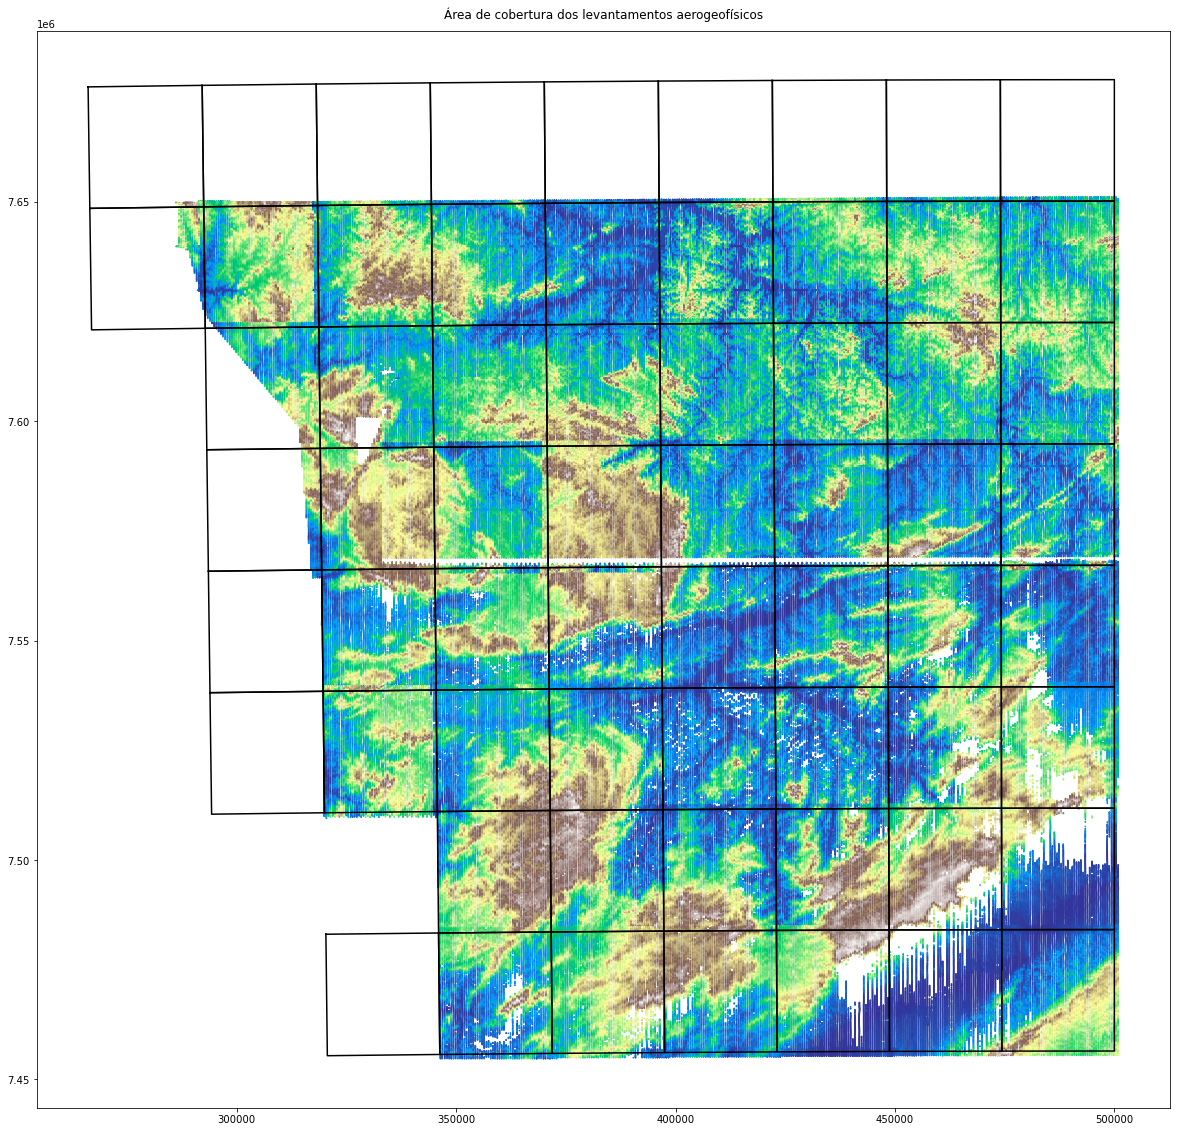

In [9]:
plt.figure(figsize=(24,16))
for id in list(quadricula.keys()):
    carta=quadricula[id]
    plt.plot(*transform_to_carta_utm(carta['folha']).exterior.xy,color='black')
    for data in list(carta.keys())[2:]:
        if 'mag' in data:
            pass
        else:
            plt.scatter(carta[data].X,carta[data].Y,c=carta[data].MDT,cmap='terrain',s=0.5,marker='H')
            plt.axis('scaled')
plt.suptitle('Área de cobertura dos levantamentos aerogeofísicos')
plt.tight_layout()

## Visualizando dados Radiométricos Brutos

             count         mean          std        min        0.1%        1%  \
CTCOR     518730.0  1271.317170  1723.240822 -11834.130 -132.849810  -13.7355   
eTh       518730.0    16.668995    22.999558     -3.800   -0.300000    0.6000   
eU        518730.0     0.426134     3.361458   -129.300   -2.800000   -1.0000   
KPERC     518730.0     0.671864     0.925000   -149.323   -0.187000   -0.0910   
MDT       518730.0   937.725251   144.120862    562.040  579.210000  663.5387   
THKRAZAO  518730.0   106.612181   596.750457      0.155    0.786458    2.2940   
UTHRAZAO  518730.0     0.029417     0.038285      0.000    0.000000    0.0010   
UKRAZAO   518730.0     2.913413    84.947566      0.002    0.004000    0.0060   

                 5%      25%        50%        75%        99.95%         max  
CTCOR     340.28000  719.010  1066.6900  1496.0700  14904.580000  450895.020  
eTh         4.30000    9.000    13.6000    19.7000    180.100000    6371.400  
eU         -0.60000   -0.100     

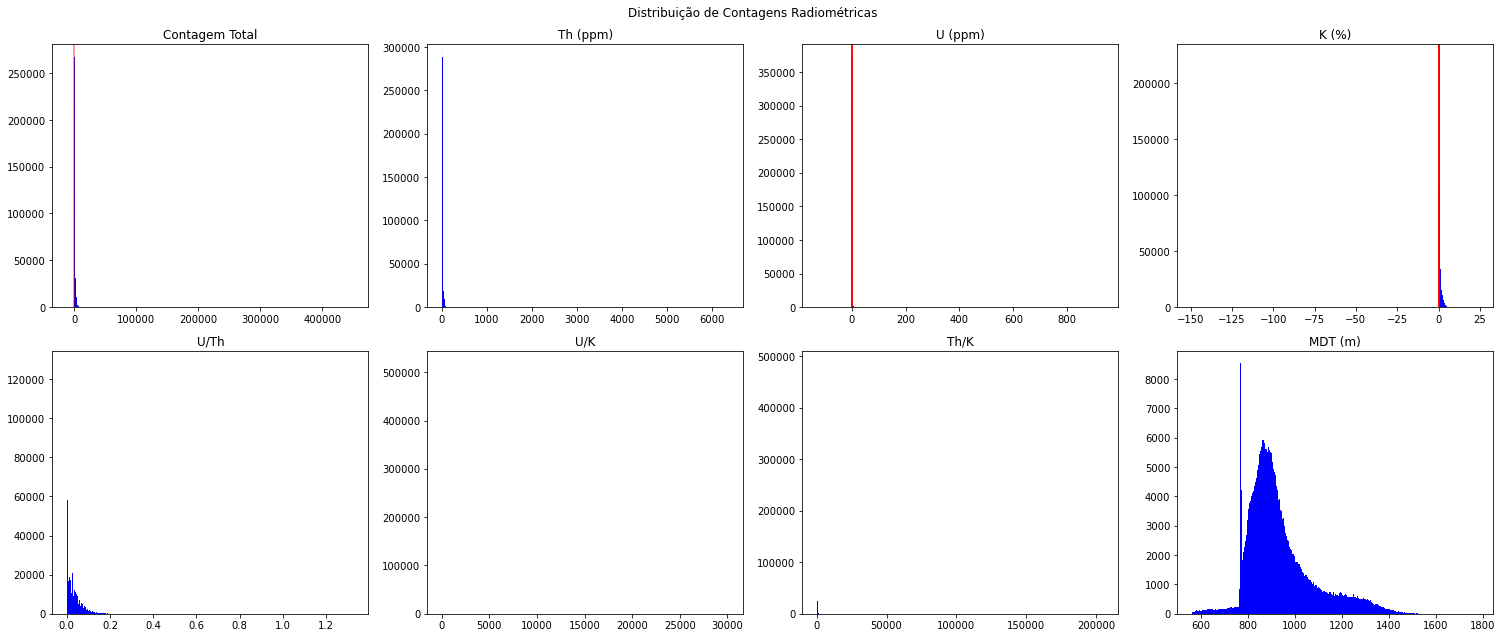

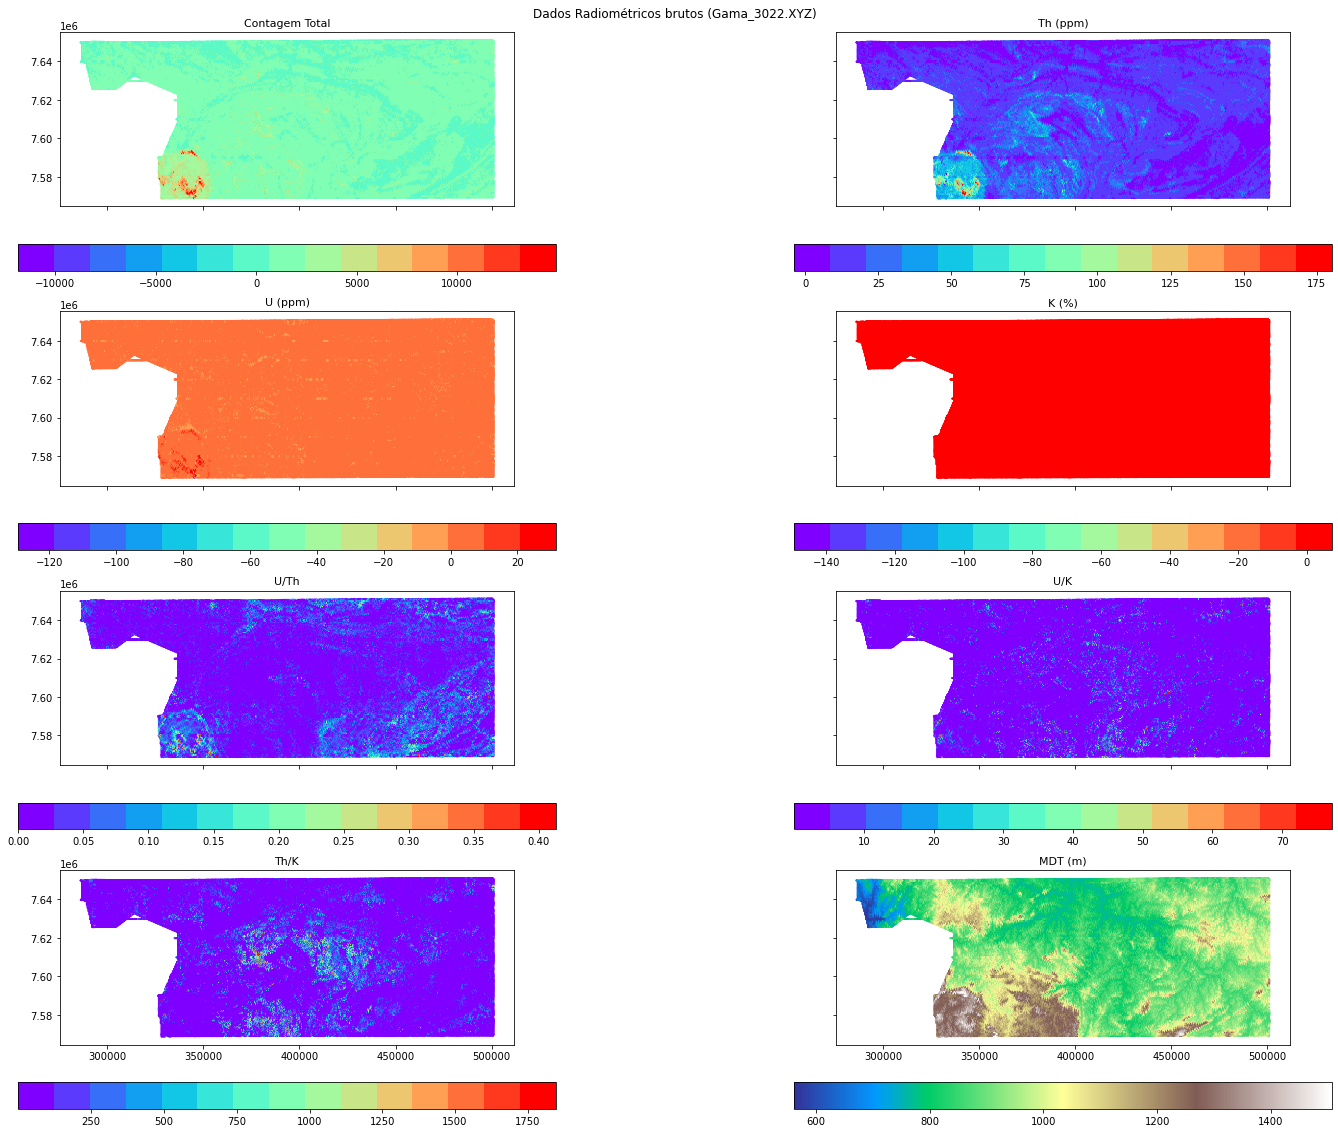

In [10]:
plot_histograms(gama_3022)
plot_raw_gama_data(gama_3022,suptitle='Dados Radiométricos brutos (Gama_3022.XYZ)')

             count         mean         std      min        0.1%       1%  \
CTCOR     625383.0    10.969396    9.033409   -2.947    1.043764    2.416   
eTh       625383.0    18.911059    9.464731   -3.080    2.202764    4.754   
eU        625383.0     1.647300    1.010855   -0.500   -0.401000   -0.090   
KPERC     625383.0     0.909759    0.715311   -0.499   -0.330000   -0.077   
MDT       625383.0  1042.766983  289.207458  513.280  521.110000  532.150   
THKRAZAO  625383.0    31.874331   29.351178    1.079    2.662000    4.977   
UTHRAZAO  625383.0     0.095037    0.043022    0.000    0.000000    0.021   
UKRAZAO   625383.0     2.806480    2.577063    0.046    0.161000    0.300   

               5%      25%      50%        75%       99.95%       max  
CTCOR       3.512    5.779    8.232    12.5470   103.700000   246.600  
eTh         7.189   12.136   17.381    23.7550    85.376956   223.136  
eU          0.320    0.977    1.518     2.1550     9.476180    23.934  
KPERC       0.115 

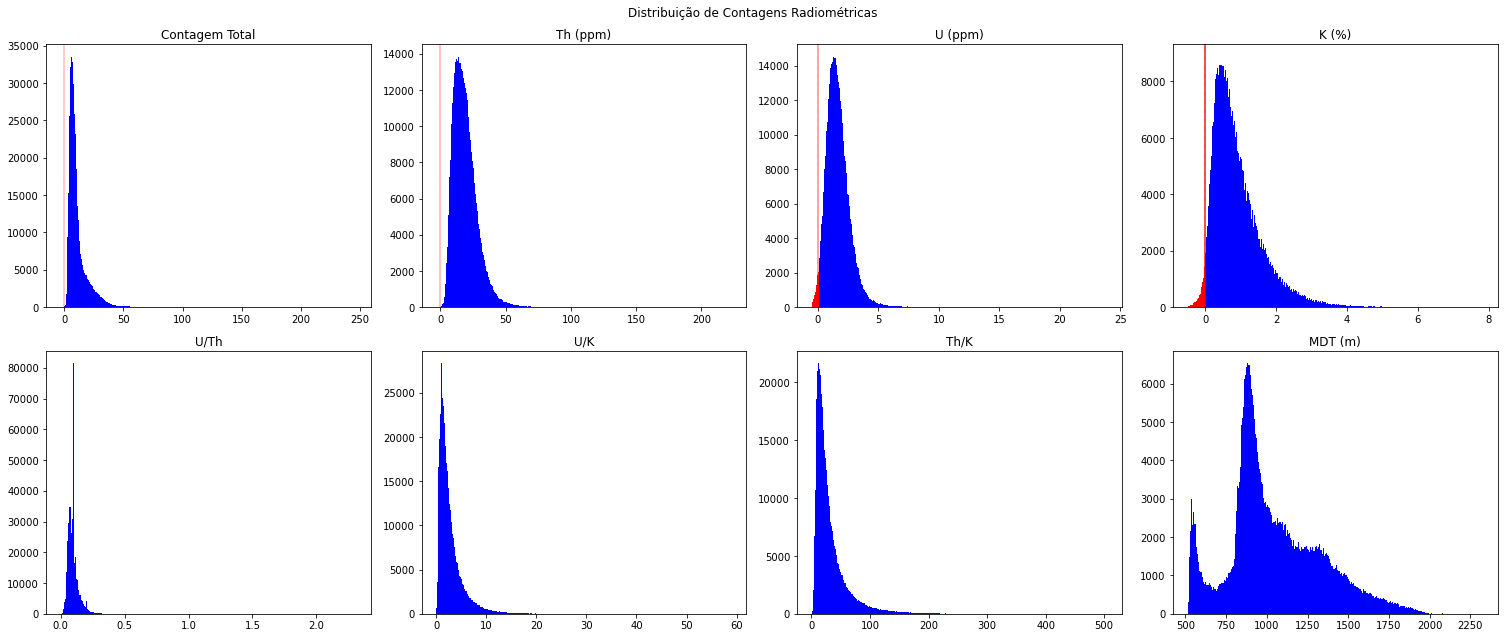

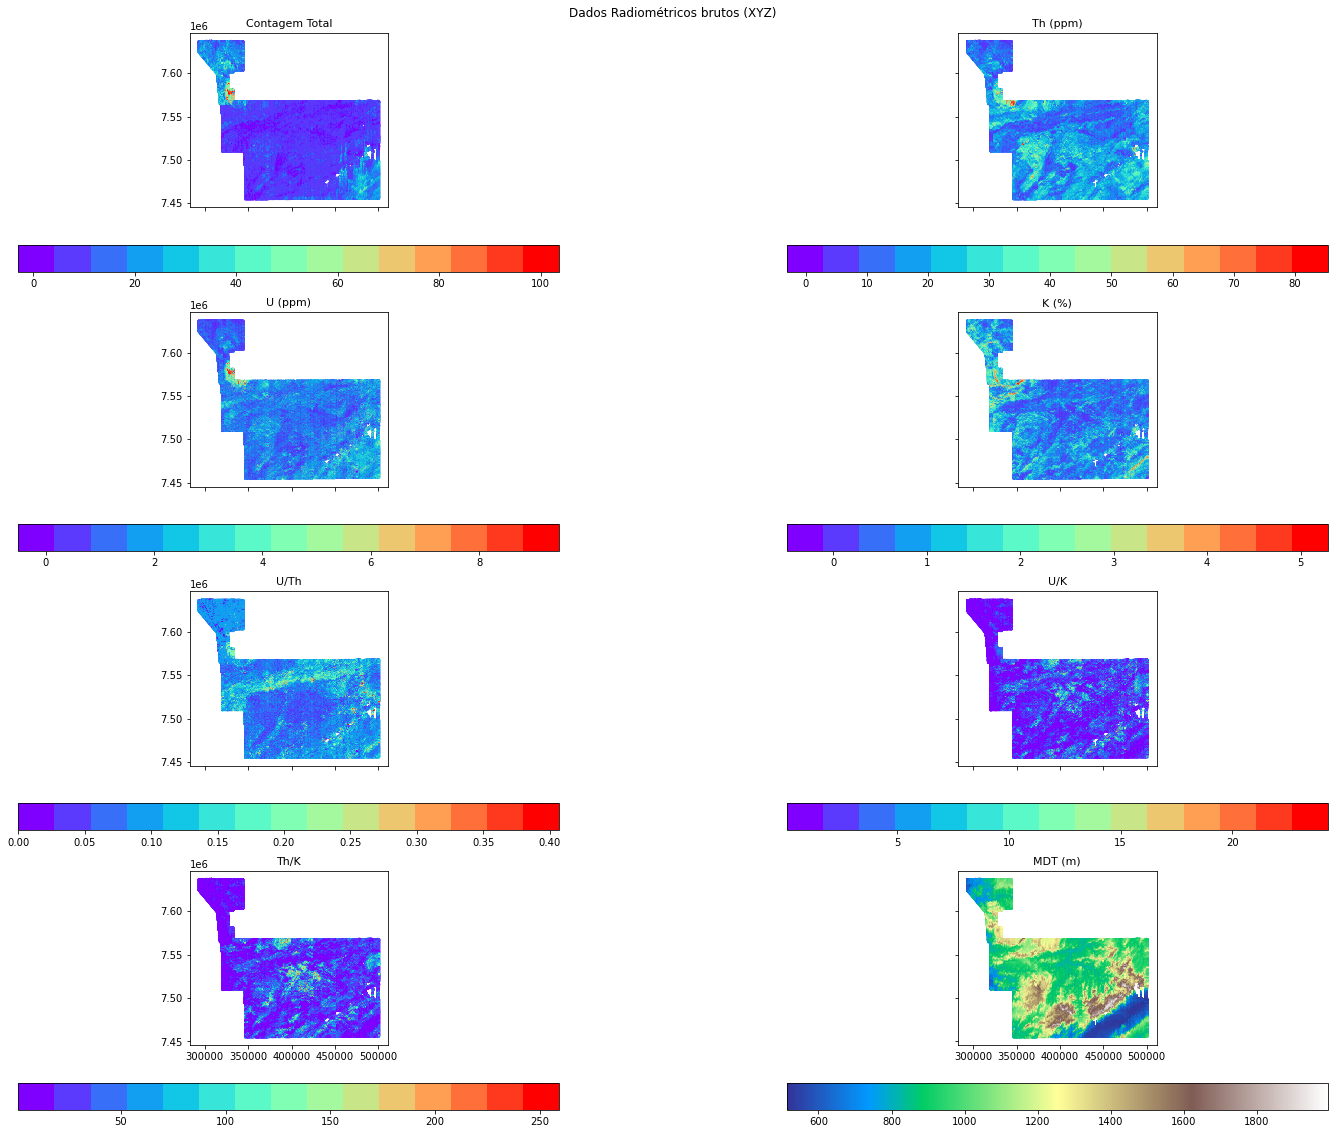

In [11]:
plot_histograms(gama_1105)
plot_raw_gama_data(gama_1105,suptitle='Dados Radiométricos brutos (XYZ)')

In [12]:
#gama_1039.rename(columns={'CTC':'CTCOR','KC':'KPERC','UC':'eU','THC':'eTh'},inplace=True)
#plot_histograms(gama_1039)
#plot_raw_gama_data(gama_1039,suptitle='Dados Radiométricos brutos (XYZ)',orientation='vertical')

## Removendo valores negativos das contagens radiométricas

In [13]:
#gama_3022_positive = remove_negative_values(gama_3022)
#plot_histograms(gama_3022_positive)
#plot_raw_gama_data(gama_3022_positive,'Dados radiométricos tratadas : value <= 0 == 0.001')

In [14]:
#gama_1039_positive=remove_negative_values(gama_1039,lista=['X','Y','LATITUDE','LONGITUDE','geometry'])
#gama_1039_positive['UTHRAZAO']=gama_1039_positive['eU']/gama_1039_positive['eTh']
#gama_1039_positive['UKRAZAO']=gama_1039_positive['eU']/gama_1039_positive['KPERC']
#gama_1039_positive['THKRAZAO']=gama_1039_positive['eTh']/gama_1039_positive['KPERC']

#plot_histograms(gama_1039_positive)
#plot_raw_gama_data(gama_1039_positive,'Dados radiométricos tratadas : value <= 0 == 0.001')

## CONSTRUINDO UM GRID SINTÉTICO

In [15]:
# REMOVING PART OF THE SINTETIC GRID
'''
df_xu_yu = pd.DataFrame(np.array([xu,yu]))
df_xu_yu=df_xu_yu.T
df_xu_yu.rename(columns={0:'xu',1:'yu'},inplace=True)

df_xu_yu[(df_xu_yu.xu < 540937) & (df_xu_yu.yu > 8866937)]

df_xu_yu.drop(df_xu_yu[(df_xu_yu.xu < 540937) & (df_xu_yu.yu > 8866937)].index,inplace=True)
plt.figure(figsize=(18,12))

plt.scatter(df_xu_yu.xu,df_xu_yu.yu,s=0.1,marker='.')
plt.axis('scaled')
'''



"\ndf_xu_yu = pd.DataFrame(np.array([xu,yu]))\ndf_xu_yu=df_xu_yu.T\ndf_xu_yu.rename(columns={0:'xu',1:'yu'},inplace=True)\n\ndf_xu_yu[(df_xu_yu.xu < 540937) & (df_xu_yu.yu > 8866937)]\n\ndf_xu_yu.drop(df_xu_yu[(df_xu_yu.xu < 540937) & (df_xu_yu.yu > 8866937)].index,inplace=True)\nplt.figure(figsize=(18,12))\n\nplt.scatter(df_xu_yu.xu,df_xu_yu.yu,s=0.1,marker='.')\nplt.axis('scaled')\n"

# Interpolação dos dados Brutos

## Método Cúbico

In [16]:
area=(344093.45426573796, 396417.36691108724, 7621768.799495494, 7677527.304557458)
int((area[3]-area[2])/100),int((area[1]-area[0])/100)

(557, 523)

In [17]:
#traditional_interpolation(quadricula,'mag_3022','gama_3022','cubic','geof_3022')

In [18]:
%matplotlib inline
df = quadricula['SF23_VD_IV']['geof_3022_cubic']
plt.figure(figsize=(12,12))
plt.scatter(x=df.X,y=df.Y,c=df.GMT,cmap='rainbow')
plt.axis('scaled')

KeyError: 'SF23_VD_IV'

In [ ]:
# Print the output. a=
descript_cubic = df.describe(percentiles)
descript_cubic[['eU','eTh','KPERC','CTCOR','UTHRAZAO','THKRAZAO','UKRAZAO']].T

In [ ]:
plot_histograms(geof_1089_cubic,suptitle='Distribuição dos dados radiométricos interpolados (cúbico, pixel 100m)')
plot_raw_data(geof_1089_cubic,suptitle='Dados radiométricos interpolados (cúbico, pixel 100m)')

## Método Nearest

In [ ]:
plot_histograms(geof_1089_nearest,suptitle='Distribuição dos dados radiométricos interpolados (nearest, pixel 100m)')

In [ ]:
plot_raw_data(geof_1089_nearest,suptitle='Dados radiométricos interpolados (nearest, pixel 100m)')

## Método Linear

In [19]:
#traditional_interpolation(quadricula,'mag_3022','gama_3022','linear','geof_3022')

In [20]:
traditional_interpolation(quadricula,'mag_line_1105','gama_line_1105','linear','geof_1105')

 - Folha: SF23_YA_III1
Atributo - ALTURA
Atributo - MDT
Atributo - ALTURA_1
Atributo - MAGIGRF
Atributo - KPERC
Atributo - eU
Atributo - eTh
Atributo - UTHRAZAO
Atributo - UKRAZAO
Atributo - MDT
Atributo - THKRAZAO
Atributo - CTCOR
Index(['ALTURA', 'X', 'Y', 'MDT', 'LATITUDE', 'LONGITUDE', 'ALTURA_1',
       'MAGIGRF'],
      dtype='object')
 - Folha: SF23_YA_III3
Atributo - ALTURA
Atributo - MDT
Atributo - ALTURA_1
Atributo - MAGIGRF
Atributo - KPERC
Atributo - eU
Atributo - eTh
Atributo - UTHRAZAO
Atributo - UKRAZAO
Atributo - MDT
Atributo - THKRAZAO
Atributo - CTCOR
Index(['ALTURA', 'X', 'Y', 'MDT', 'LATITUDE', 'LONGITUDE', 'ALTURA_1',
       'MAGIGRF'],
      dtype='object')
 - Folha: SF23_YA_III2
Atributo - ALTURA
Atributo - MDT
Atributo - ALTURA_1
Atributo - MAGIGRF
Atributo - KPERC
Atributo - eU
Atributo - eTh
Atributo - UTHRAZAO
Atributo - UKRAZAO
Atributo - MDT
Atributo - THKRAZAO
Atributo - CTCOR
Index(['ALTURA', 'X', 'Y', 'MDT', 'LATITUDE', 'LONGITUDE', 'ALTURA_1',
       'M

In [21]:
#traditional_interpolation(quadricula,'mag_1039','gama_1039','linear','geof_1039')

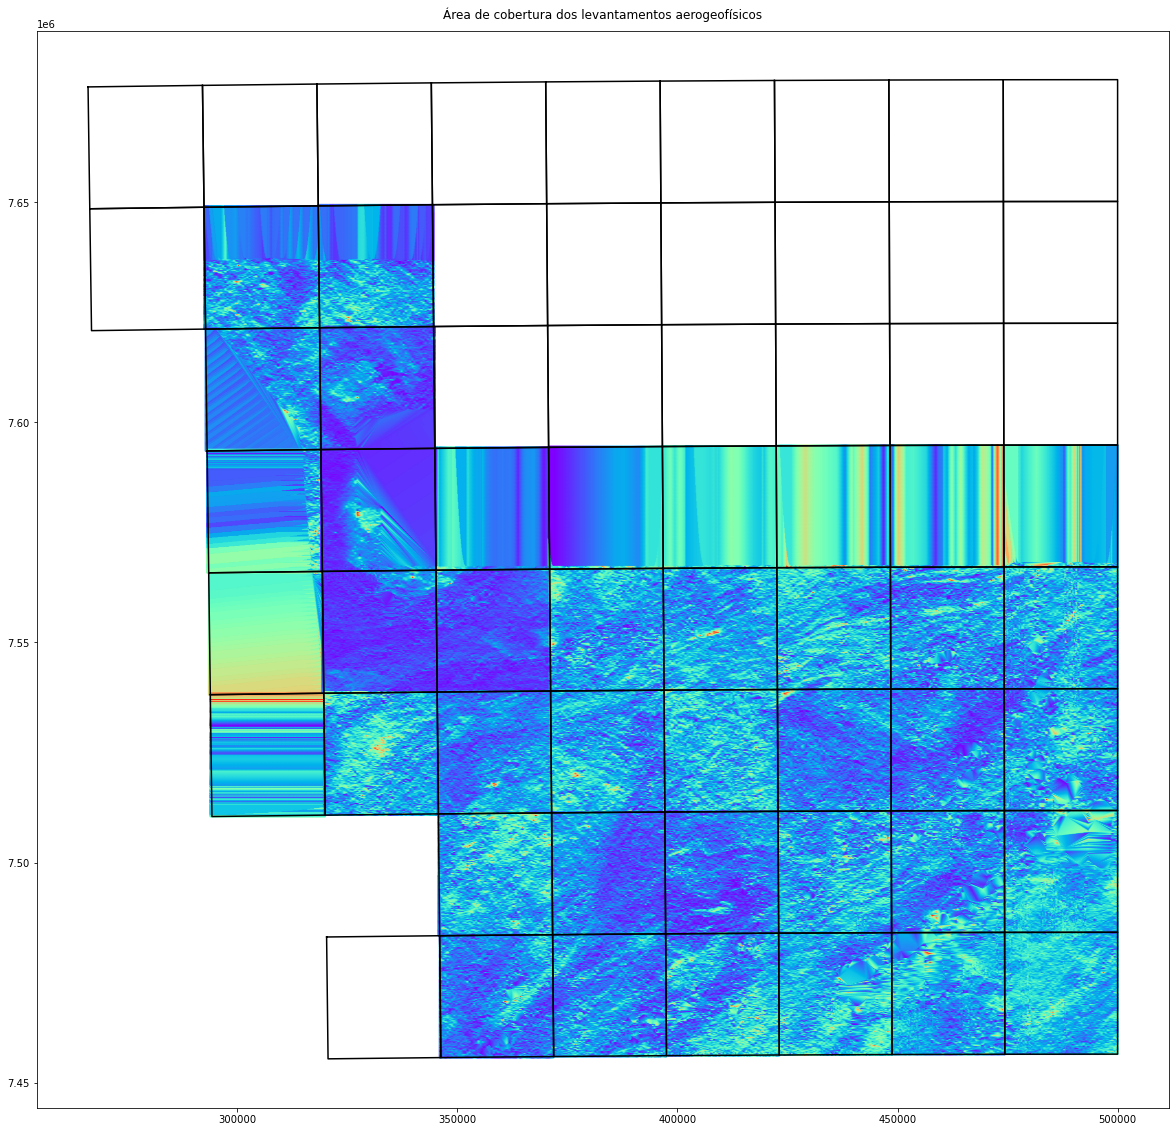

In [22]:
plt.figure(figsize=(24,16))
for id in list(quadricula.keys()):
    carta=quadricula[id]
    plt.plot(*transform_to_carta_utm(carta['folha']).exterior.xy,color='black')
    for data in list(carta.keys())[2:]:
        if 'geof' in data:
            plt.scatter(carta[data].X,carta[data].Y,c=carta[data].eU,cmap='rainbow',s=0.5,marker='H')
            plt.axis('scaled')
        else:
            pass
plt.suptitle('Área de cobertura dos levantamentos aerogeofísicos')
plt.tight_layout()

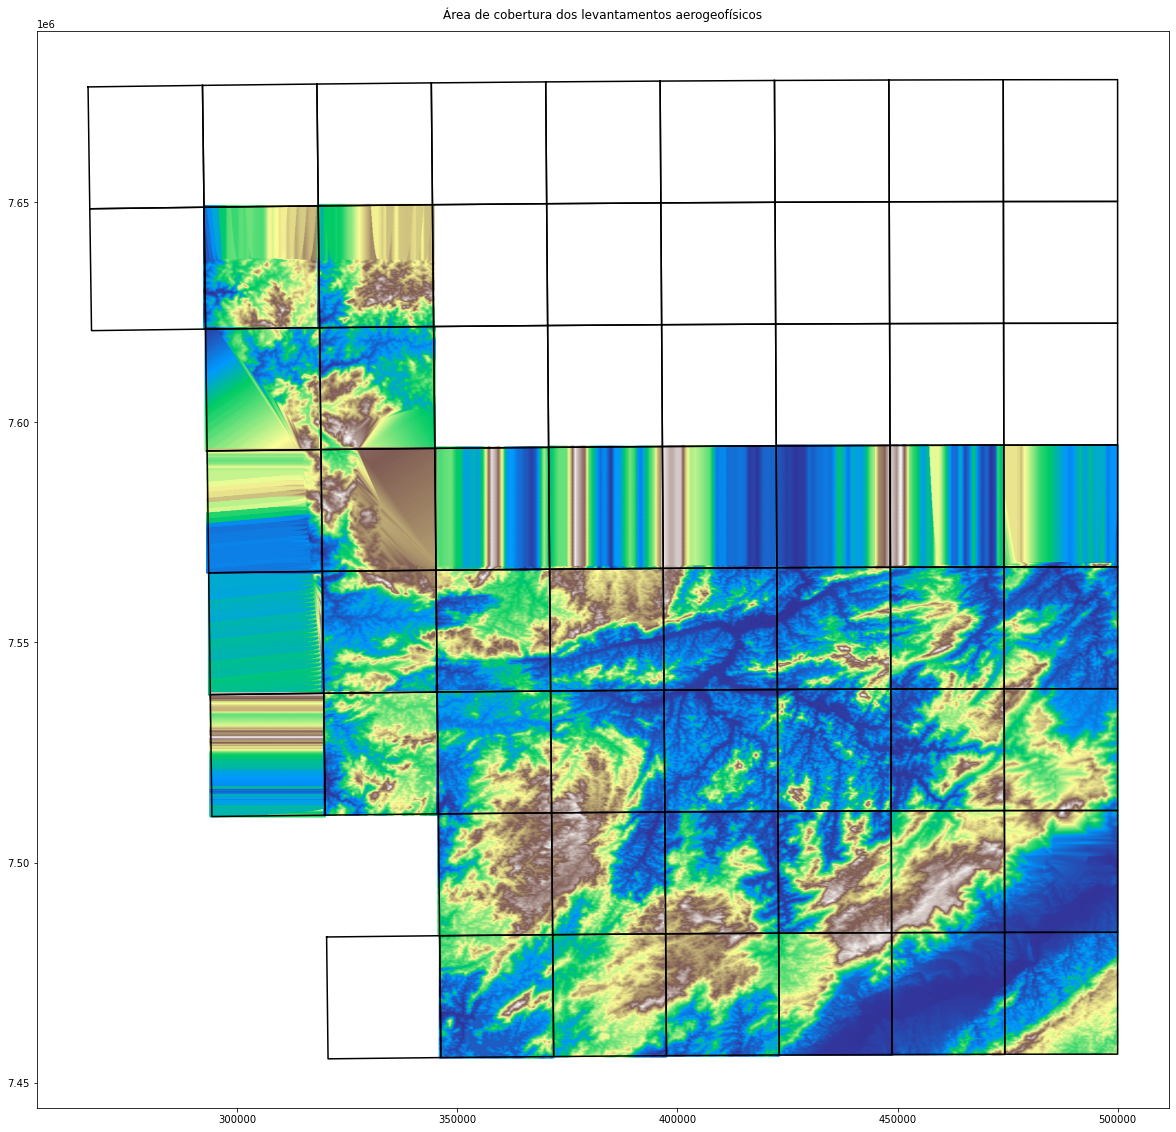

In [23]:
plt.figure(figsize=(24,16))
for id in list(quadricula.keys()):
    carta=quadricula[id]
    plt.plot(*transform_to_carta_utm(carta['folha']).exterior.xy,color='black')
    for data in list(carta.keys())[2:]:
        if 'geof' in data:
            plt.scatter(carta[data].X,carta[data].Y,c=carta[data].MDT,cmap='terrain',s=0.5,marker='H')
            plt.axis('scaled')
        else:
            pass
plt.suptitle('Área de cobertura dos levantamentos aerogeofísicos')
plt.tight_layout()

# Classificações Não-Supervisionadas

## Rotulando amostras com classes litológicas

In [24]:
import shapely.speedups
from shapely import geometry
shapely.speedups.enable()

#geof_1089_linear['geometry'] = [geometry.Point(x,y) for x, y in zip(geof_1089_linear['X'], geof_1089_linear['Y'])]
#gdf_1089_linear = geof_1089_linear.set_geometry('geometry')

#gdf_1089_linear.set_crs('EPSG:32723',inplace=True)
#gdf_1089_linear.geometry

In [25]:
Upload_litologia(quadricula,'litologia_100k')

 22%|██▏       | 14/63 [00:21<01:15,  1.53s/it]

 - litologia_100k atualizado na folha: SF23_YB_II1


 24%|██▍       | 15/63 [00:23<01:13,  1.53s/it]

 - litologia_100k atualizado na folha: SF23_YB_II3


 25%|██▌       | 16/63 [00:24<01:11,  1.53s/it]

 - litologia_100k atualizado na folha: SF23_YB_V1


 27%|██▋       | 17/63 [00:26<01:10,  1.52s/it]

 - litologia_100k atualizado na folha: SF23_YB_V3


 29%|██▊       | 18/63 [00:27<01:08,  1.52s/it]

 - litologia_100k atualizado na folha: SF23_YB_II2


 30%|███       | 19/63 [00:29<01:06,  1.51s/it]

 - litologia_100k atualizado na folha: SF23_YB_II4


 32%|███▏      | 20/63 [00:30<01:04,  1.51s/it]

 - litologia_100k atualizado na folha: SF23_YB_V2


 33%|███▎      | 21/63 [00:32<01:03,  1.51s/it]

 - litologia_100k atualizado na folha: SF23_YB_V4


 35%|███▍      | 22/63 [00:33<01:01,  1.51s/it]

 - litologia_100k atualizado na folha: SF23_YB_III1


 37%|███▋      | 23/63 [00:35<01:00,  1.52s/it]

 - litologia_100k atualizado na folha: SF23_YB_III3


 38%|███▊      | 24/63 [00:36<00:59,  1.52s/it]

 - litologia_100k atualizado na folha: SF23_YB_VI1


 40%|███▉      | 25/63 [00:38<00:57,  1.52s/it]

 - litologia_100k atualizado na folha: SF23_YB_VI3


 41%|████▏     | 26/63 [00:39<00:55,  1.51s/it]

 - litologia_100k atualizado na folha: SF23_YB_III2


 43%|████▎     | 27/63 [00:41<00:54,  1.51s/it]

 - litologia_100k atualizado na folha: SF23_YB_III4


 44%|████▍     | 28/63 [00:42<00:52,  1.51s/it]

 - litologia_100k atualizado na folha: SF23_YB_VI2


 46%|████▌     | 29/63 [00:44<00:51,  1.51s/it]

 - litologia_100k atualizado na folha: SF23_YB_VI4


 48%|████▊     | 30/63 [00:45<00:49,  1.51s/it]

 - litologia_100k atualizado na folha: SF23_VD_I1


 54%|█████▍    | 34/63 [00:51<00:43,  1.52s/it]

 - litologia_100k atualizado na folha: SF23_VD_I2


 56%|█████▌    | 35/63 [00:53<00:42,  1.52s/it]

 - litologia_100k atualizado na folha: SF23_VD_I4


 57%|█████▋    | 36/63 [00:54<00:40,  1.52s/it]

 - litologia_100k atualizado na folha: SF23_VD_IV2


 60%|██████    | 38/63 [00:57<00:38,  1.52s/it]

 - litologia_100k atualizado na folha: SF23_VD_II1


 62%|██████▏   | 39/63 [00:59<00:36,  1.53s/it]

 - litologia_100k atualizado na folha: SF23_VD_II3


 63%|██████▎   | 40/63 [01:00<00:34,  1.52s/it]

 - litologia_100k atualizado na folha: SF23_VD_V1


 65%|██████▌   | 41/63 [01:02<00:33,  1.52s/it]

 - litologia_100k atualizado na folha: SF23_VD_V3


 67%|██████▋   | 42/63 [01:03<00:31,  1.52s/it]

 - litologia_100k atualizado na folha: SF23_VD_II2


 68%|██████▊   | 43/63 [01:05<00:30,  1.51s/it]

 - litologia_100k atualizado na folha: SF23_VD_II4


 70%|██████▉   | 44/63 [01:06<00:28,  1.51s/it]

 - litologia_100k atualizado na folha: SF23_VD_V2


 71%|███████▏  | 45/63 [01:08<00:27,  1.51s/it]

 - litologia_100k atualizado na folha: SF23_VD_V4


 73%|███████▎  | 46/63 [01:09<00:25,  1.52s/it]

 - litologia_100k atualizado na folha: SF23_VD_III1


 75%|███████▍  | 47/63 [01:11<00:24,  1.52s/it]

 - litologia_100k atualizado na folha: SF23_VD_III3


 76%|███████▌  | 48/63 [01:13<00:22,  1.52s/it]

 - litologia_100k atualizado na folha: SF23_VD_VI1


 78%|███████▊  | 49/63 [01:14<00:21,  1.53s/it]

 - litologia_100k atualizado na folha: SF23_VD_VI3


 79%|███████▉  | 50/63 [01:16<00:19,  1.53s/it]

 - litologia_100k atualizado na folha: SF23_VD_III2


 81%|████████  | 51/63 [01:17<00:18,  1.55s/it]

 - litologia_100k atualizado na folha: SF23_VD_III4


 83%|████████▎ | 52/63 [01:19<00:16,  1.54s/it]

 - litologia_100k atualizado na folha: SF23_VD_VI2


 84%|████████▍ | 53/63 [01:20<00:15,  1.53s/it]

 - litologia_100k atualizado na folha: SF23_VD_VI4


100%|██████████| 63/63 [01:35<00:00,  1.52s/it]


In [26]:
litologia=quadricula['SB24_ZB_II']['litologia_100k']
litologia.to_crs('EPSG:32724',inplace=True)
print(litologia.crs)
litologia.reset_index(drop=True,inplace=True)

dic_litologico = describe_geologico(litologia)
print(litologia.columns)

KeyError: 'SB24_ZB_II'

In [ ]:
print(dic_litologico['SIGLA']['len'])
print(dic_litologico['SIGLA']['lista'])
gdf_1089_linear

In [ ]:
litologia.plot('SIGLA',figsize=(16,16),legend=True)

In [ ]:
#geof_1089_linear['closest_unit'] = geof_1089_linear['geometry'].apply(lambda x: litologia['SIGLA'].iloc[litologia.distance(x).idxmin()]) # .idxmin() Retorna o indice do menor valor 

In [ ]:
#geof_1089_linear.to_csv('/home/ggrl/database/csv/SB24_ZB_II_gama_linear_100m.csv',index=False)

## Self-organizing maps (SOM)

            count        mean         std         min        0.1%          1%  \
CTCOR     72540.0    6.556663    2.714042    1.382123    1.918697    2.511803   
eTh       72540.0   14.111680    5.511084    1.681087    3.412660    5.263821   
eU        72540.0    1.631793    0.700664    0.001000    0.053025    0.272788   
KPERC     72540.0    1.097042    0.695067    0.001000    0.012373    0.079694   
MDT       72540.0  856.902584  101.569648  627.918941  631.338414  648.888914   
THKRAZAO  72540.0   19.543338   16.939744    2.929159    3.615296    4.550159   
UTHRAZAO  72540.0    0.121622    0.036081    0.016837    0.035372    0.054940   
UKRAZAO   72540.0    2.345202    2.136376    0.146864    0.294002    0.468055   

                  5%         25%         50%         75%       99.95%  \
CTCOR       3.154540    4.430985    6.048423    8.173215    18.402186   
eTh         7.069359   10.067320   12.999046   17.351470    43.680056   
eU          0.608088    1.146054    1.557953    2.0

KeyError: 'MAGIGRF'

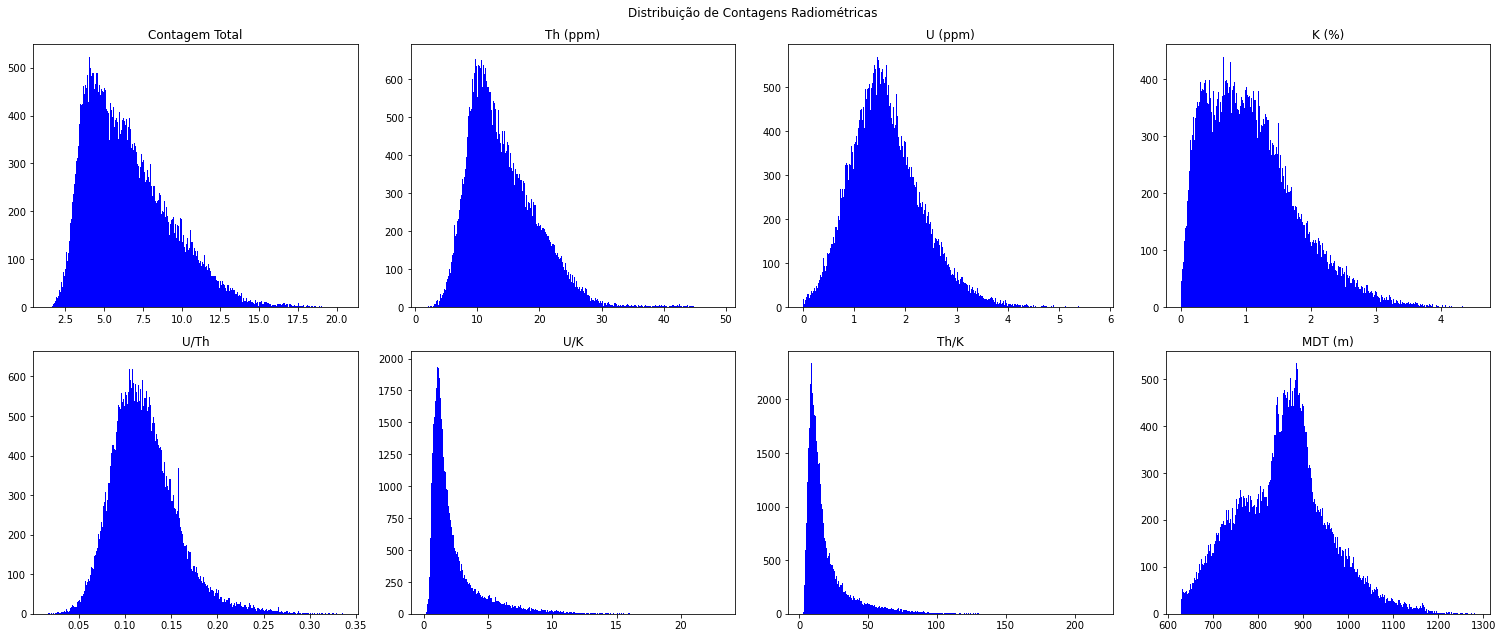

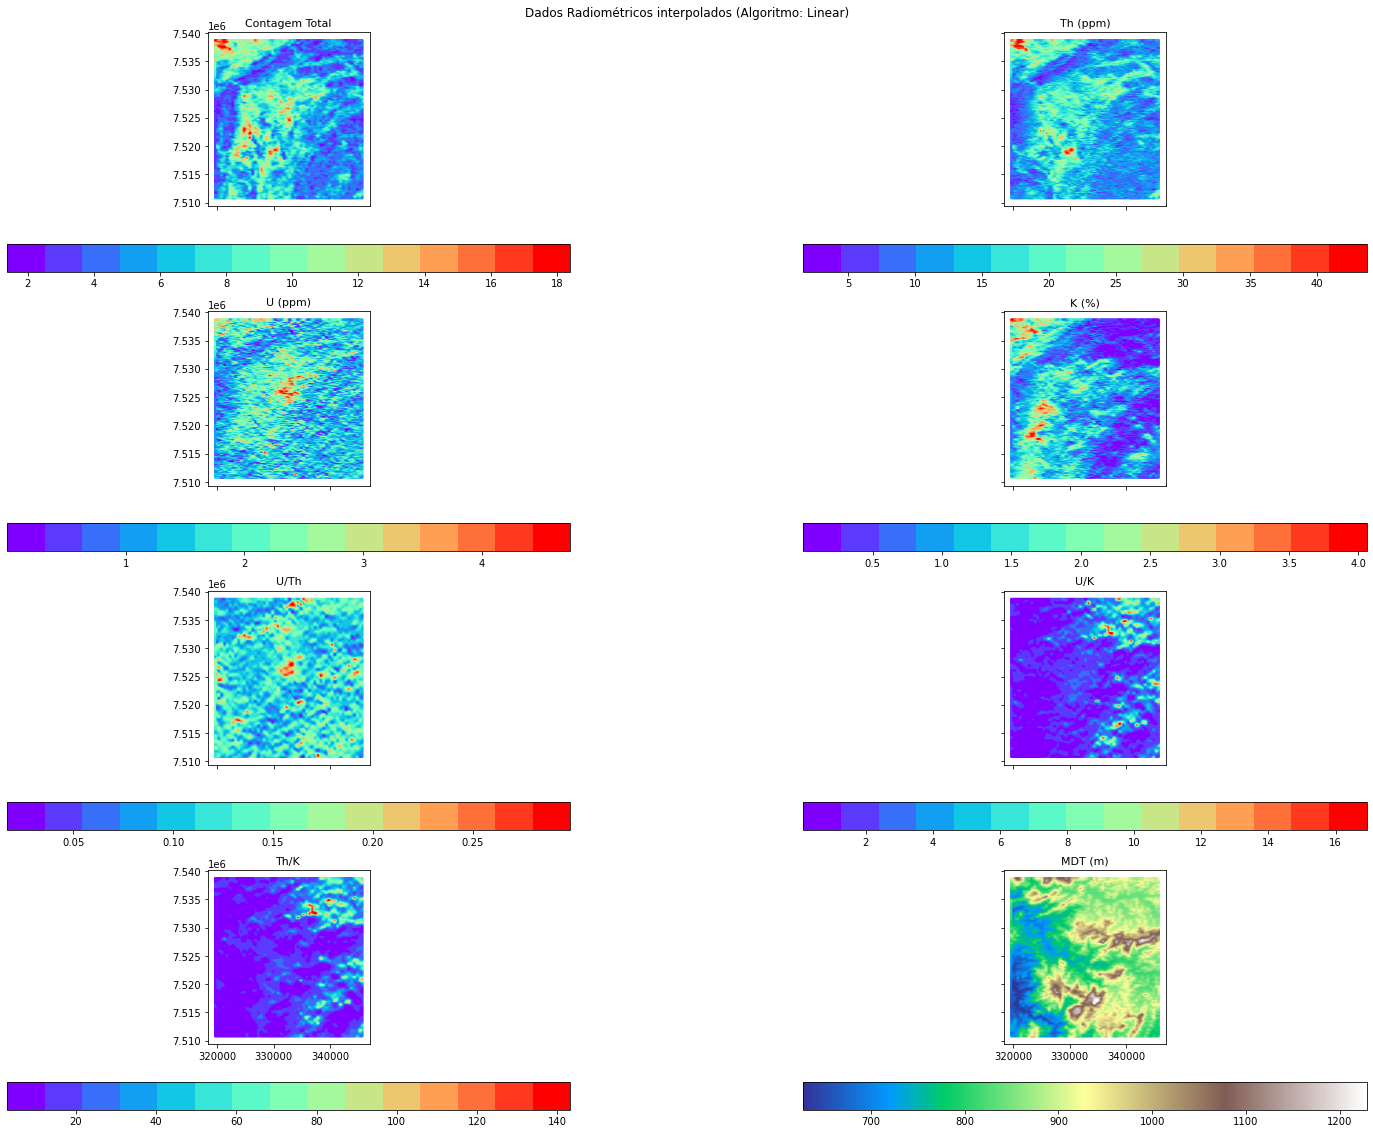

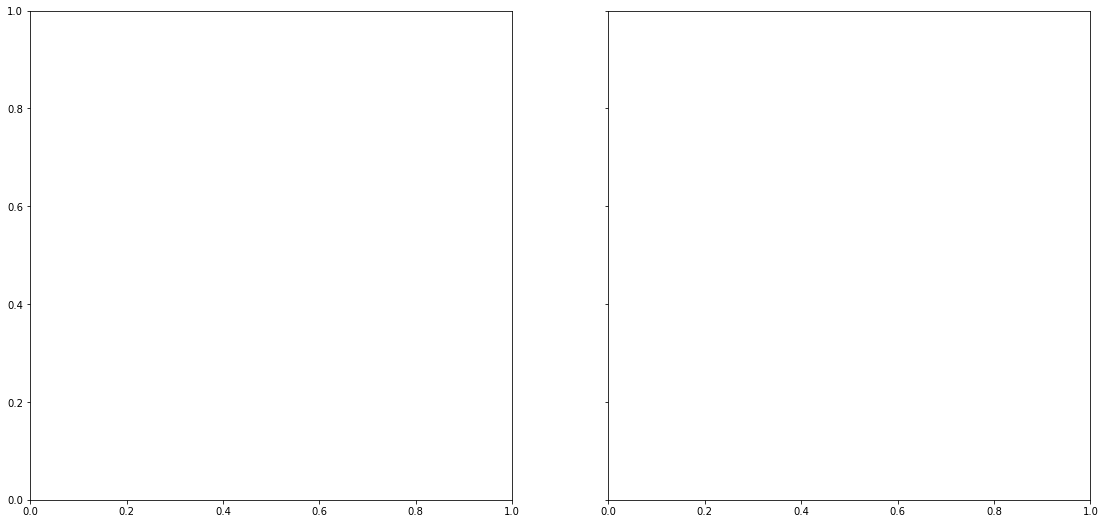

In [27]:
df = quadricula['SF23_YA_III4']['geof_1105_linear']
plot_histograms(df)
plot_raw_gama_data(df,suptitle='Dados Radiométricos interpolados (Algoritmo: Linear)',figsize=(27,16))
plot_raw_mag_data(df,suptitle='Dados Magnetométricos interpolados (Algoritmo: Linear)')

In [30]:
df_rs = df
df_rs.rename(columns={'X':'E_utm','Y':'N_utm'},inplace=True)
#df_rs.fillna(0,inplace=True)

### Pixel size

In [31]:
xpixel_size = (df_rs.E_utm.max()-df_rs.E_utm.min())/df_rs.E_utm.unique().size
ypixel_size = (df_rs.N_utm.max()-df_rs.N_utm.min())/df_rs.N_utm.unique().size
print('x:', xpixel_size, 'y:', ypixel_size)

x: 100.16579455615407 y: 100.21072649280123


In [32]:
nx=df_rs.E_utm.unique().size
ny=df_rs.N_utm.unique().size
ratio=ny/nx
xs = df_rs.E_utm.values.reshape(ny, nx)
ys = df_rs.N_utm.values.reshape(ny, nx)

In [33]:
features = list(df_rs.columns[2:])
print(features)

['MDT', 'CTCOR', 'KPERC', 'eU', 'eTh', 'GMT', 'UTHRAZAO', 'UKRAZAO', 'THKRAZAO']


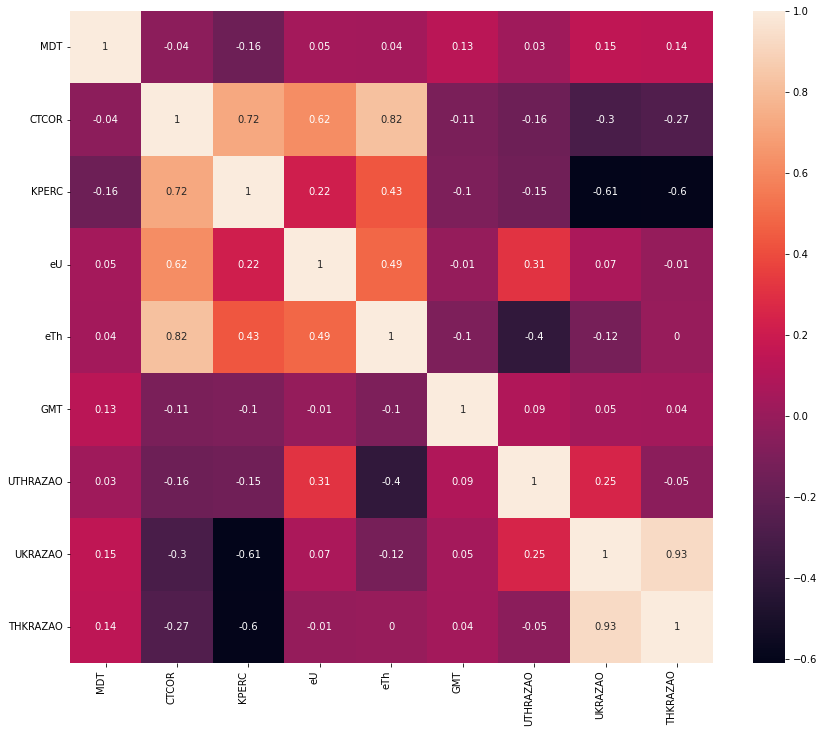

In [34]:
import seaborn as sns

def plot_corr(dataframe, size=10):
    plt.figure(figsize = (size+size*0.2, size), facecolor='w')
    corrMatrix = dataframe.corr()
    sns.heatmap(np.round(corrMatrix,2), annot=True)
    plt.xticks(rotation=90, ha='right')
    plt.yticks(rotation=0, ha='right')

plot_corr(df_rs[features], size=12)
#plt.savefig('figs/correlation_matrix.png', dpi=400, bbox_inches='tight')

In [35]:
from sklearn_som.som import SOM

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(df[features].values)
# data = df_rs[features].values

In [37]:
n_clusters=5
lito_SOM = SOM(m=n_clusters, n=1, sigma=1.5, dim=len(features), max_iter=10000)
lito_SOM.fit(data)

In [38]:
# predição de classes
predictions = lito_SOM.predict(data)

In [39]:
# create labels
cluster_labels=[]
for i in range(n_clusters):
    cluster_labels+=[f'Classe {i+1}']

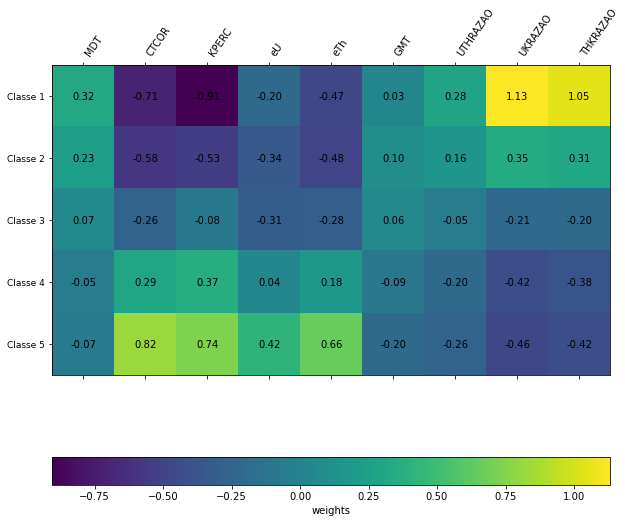

In [40]:
# classes weights
fig, ax = plt.subplots(figsize=(19,19))
im=ax.matshow(lito_SOM.weights)
for (i, j), z in np.ndenumerate(lito_SOM.weights):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')

plt.yticks(range(n_clusters), cluster_labels, fontsize=9)
plt.xticks(range(len(features)), features, rotation=55, fontsize=10, ha='left')
fig.colorbar(im, label='weights', orientation='horizontal')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(10, 10)
plt.show()

In [41]:
import matplotlib
id_ = [1,2,3,4,5]
relcolor =  matplotlib.cm.Set3
colors = np.array(relcolor.colors)[id_]
relcolor = matplotlib.colors.ListedColormap(colors)

In [42]:
idxs=np.arange(0, n_clusters, 1)
half=(idxs[1]-idxs[0])/2
ticks=np.linspace(idxs[0]+half, idxs[-1]-half, n_clusters)

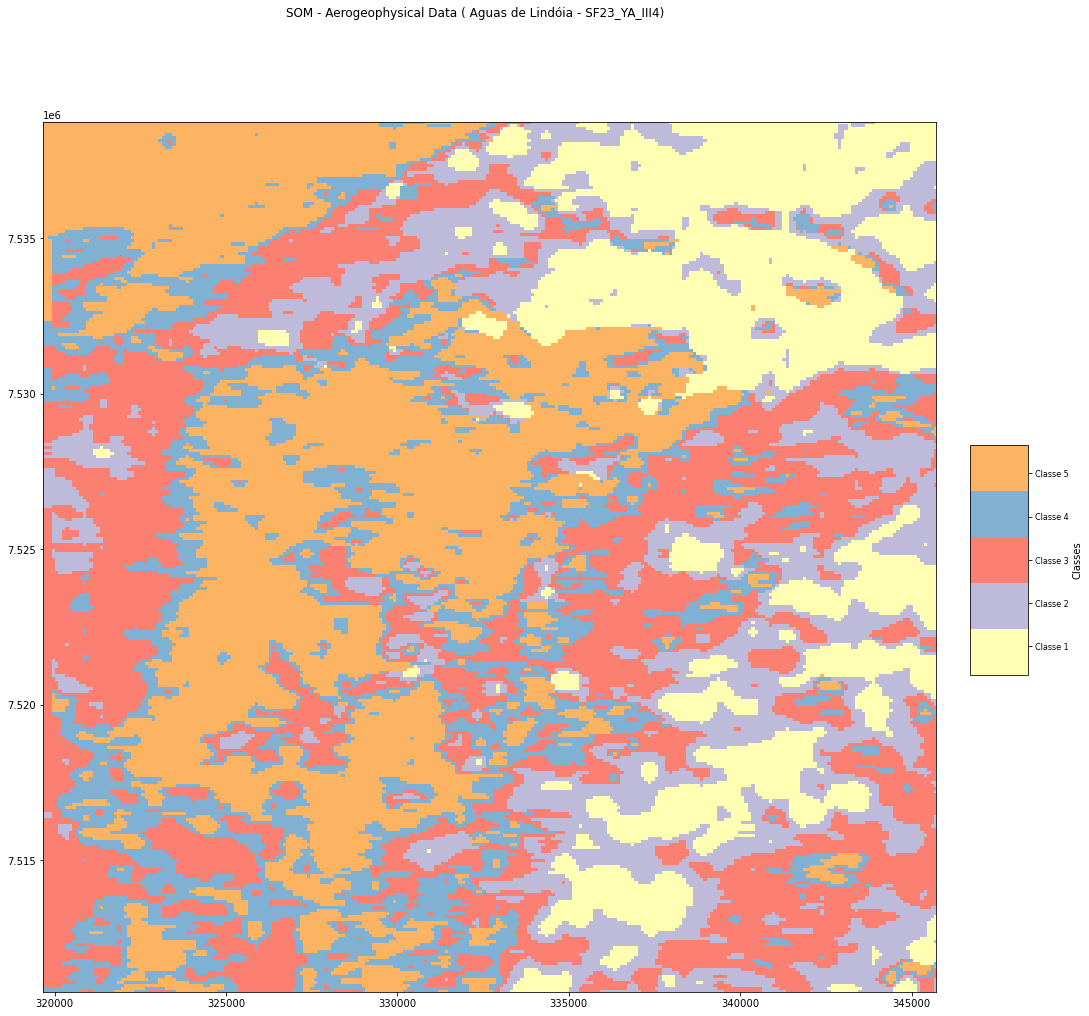

In [43]:
fig, ax=plt.subplots(figsize=(16, 16), facecolor='w')
im=plt.pcolormesh(xs, ys, predictions.reshape(ny, nx), cmap=relcolor, shading='auto')
plt.xlim(xs.min(), xs.max())
plt.ylim(ys.min(), ys.max())
cbar_ax = fig.add_axes([0.93, 0.3, 0.05, 0.4])
cbar = fig.colorbar(im, cax=cbar_ax, label = u'Classes', orientation='vertical',
                    ticks=ticks)
cbar.ax.set_yticklabels(cluster_labels, fontsize=8)
plt.suptitle('SOM - Aerogeophysical Data ( Aguas de Lindóia - SF23_YA_III4)')
plt.axis('scaled')
plt.show()

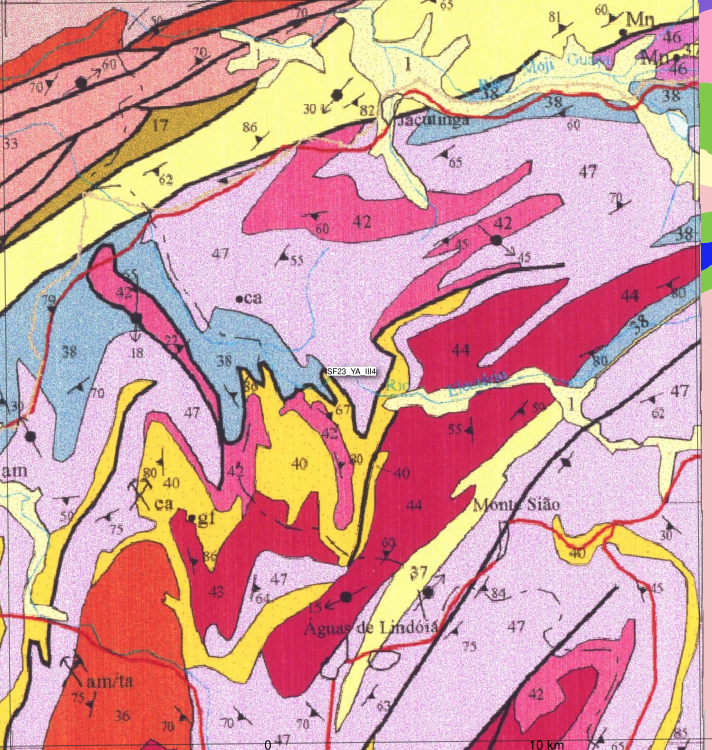

In [44]:
from IPython.display import Image
Image('/home/ggrl/projetos/geologist/plots/Screenshot_2022-05-30_13-17-47.png')


In [ ]:
[16:42:25]

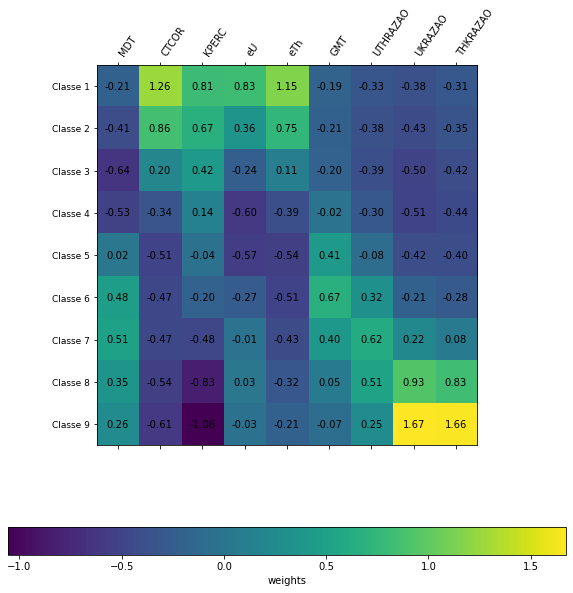

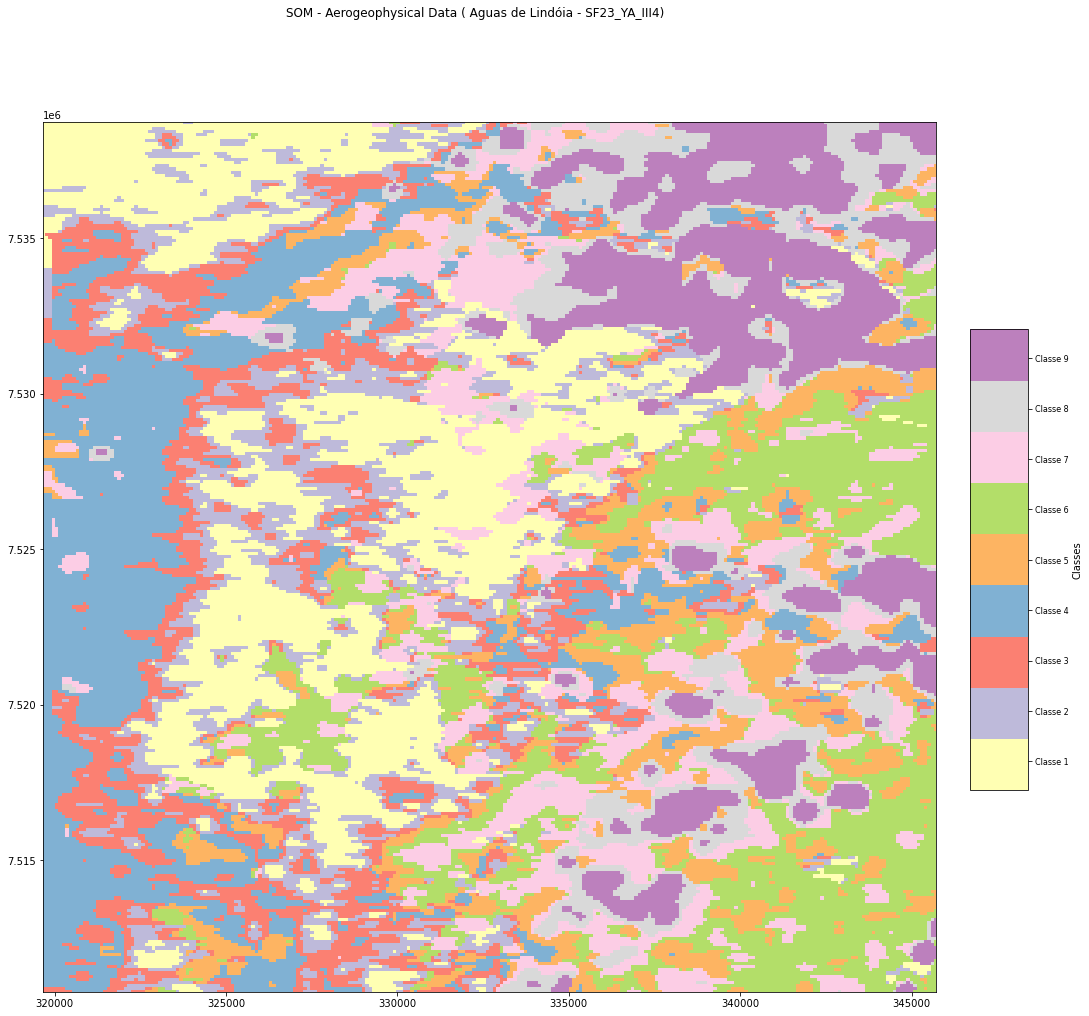

In [46]:
n_clusters=9
lito_SOM = SOM(m=n_clusters, n=1, sigma=1.5, dim=len(features), max_iter=10000)
lito_SOM.fit(data)
# predição de classes
predictions = lito_SOM.predict(data)
# create labels
cluster_labels=[]
for i in range(n_clusters):
    cluster_labels+=[f'Classe {i+1}']
# classes weights
fig, ax = plt.subplots(figsize=(19,19))
im=ax.matshow(lito_SOM.weights)
for (i, j), z in np.ndenumerate(lito_SOM.weights):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')

plt.yticks(range(n_clusters), cluster_labels, fontsize=9)
plt.xticks(range(len(features)), features, rotation=55, fontsize=10, ha='left')
fig.colorbar(im, label='weights', orientation='horizontal')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(10, 10)
plt.show()
import matplotlib
id_ = [1,2,3,4,5,6,7,8,9]
relcolor =  matplotlib.cm.Set3
colors = np.array(relcolor.colors)[id_]
relcolor = matplotlib.colors.ListedColormap(colors)
idxs=np.arange(0, n_clusters, 1)
half=(idxs[1]-idxs[0])/2
ticks=np.linspace(idxs[0]+half, idxs[-1]-half, n_clusters)
fig, ax=plt.subplots(figsize=(16, 16), facecolor='w')
im=plt.pcolormesh(xs, ys, predictions.reshape(ny, nx), cmap=relcolor, shading='auto')
plt.xlim(xs.min(), xs.max())
plt.ylim(ys.min(), ys.max())
cbar_ax = fig.add_axes([0.93, 0.3, 0.05, 0.4])
cbar = fig.colorbar(im, cax=cbar_ax, label = u'Classes', orientation='vertical',
                    ticks=ticks)
cbar.ax.set_yticklabels(cluster_labels, fontsize=8)
plt.suptitle('SOM - Aerogeophysical Data ( Aguas de Lindóia - SF23_YA_III4)')
plt.axis('scaled')
plt.show()
